# Twitter Sentiment Capstone

**Author: Mohamed Emran**

**Date: 5/31/2023**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [2]:
# df = pd.read_csv("twitter_data_emotions.csv", chunksize=2000000)
pd.options.display.max_colwidth = 1000

In [3]:
# df = pd.read_csv("twitter_data_emotions.csv", header=None, nrows=700000, encoding='latin-1')
df = pd.read_csv("twitter_data_emotions.csv", header=None, encoding='latin-1')

In [4]:
df.columns = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']
df.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [5]:
df.shape

(1600000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df.isna().sum()

Sentiment    0
Id           0
Date         0
Flag         0
User         0
Tweet        0
dtype: int64

**We don't see any Null Values**

In [8]:
df['User'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: User, Length: 659775, dtype: int64

In [9]:
df['Date'].value_counts()

Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri Jun 05 14:13:07 PDT 2009    16
                                ..
Sun Jun 07 12:36:07 PDT 2009     1
Sun Jun 07 12:36:04 PDT 2009     1
Sun Jun 07 12:36:03 PDT 2009     1
Sun Jun 07 12:36:02 PDT 2009     1
Tue Jun 16 08:40:50 PDT 2009     1
Name: Date, Length: 774363, dtype: int64

In [10]:
df['Flag'].value_counts()

NO_QUERY    1600000
Name: Flag, dtype: int64

It doesn't seem to have any value. So we can drop the column

In [11]:
#dropping column Flag
df = df.drop(columns='Flag')

In [12]:
df['Sentiment'].value_counts()

0    800000
4    800000
Name: Sentiment, dtype: int64

In [13]:
df["Sentiment"] = np.where(df["Sentiment"] == 4, 1, 0)

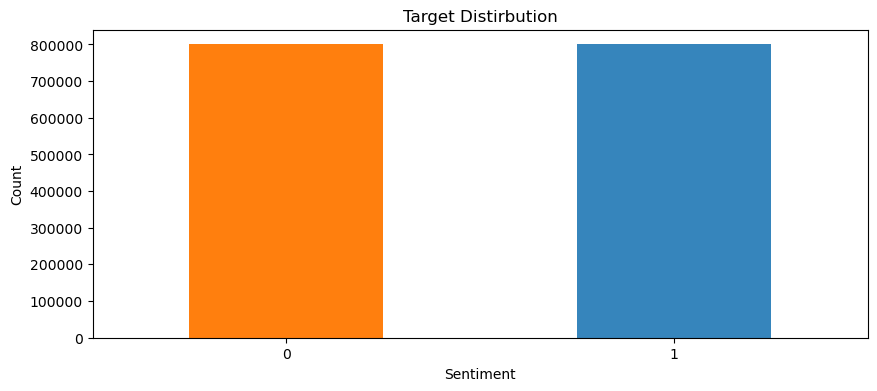

In [14]:
plt.figure(figsize=(10,4))
df['Sentiment'].value_counts().plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC'])
plt.title("Target Distirbution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

As we observe the graph above we have a balanced data set

In [15]:
df.duplicated().sum()

0

We don't see any duplicate values. We can further explore in our data.

In [16]:
df.head(2)

,Sentiment,Id,Date,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!


In [17]:
df.tail(2)

,Sentiment,Id,Date,User,Tweet
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [18]:
# removed PDT from the Date
df['Date'] = df['Date'].str.replace('PDT', '')

In [19]:
# sanity check
df['Date']

0          Mon Apr 06 22:19:45  2009
1          Mon Apr 06 22:19:49  2009
2          Mon Apr 06 22:19:53  2009
3          Mon Apr 06 22:19:57  2009
4          Mon Apr 06 22:19:57  2009
                     ...            
1599995    Tue Jun 16 08:40:49  2009
1599996    Tue Jun 16 08:40:49  2009
1599997    Tue Jun 16 08:40:49  2009
1599998    Tue Jun 16 08:40:49  2009
1599999    Tue Jun 16 08:40:50  2009
Name: Date, Length: 1600000, dtype: object

In [20]:
# converts to date and time - Don't run takes longer time to finish executing******
df["Date"] = pd.to_datetime(df["Date"])

In [21]:
# sanity check converted to date and time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Sentiment  1600000 non-null  int32         
 1   Id         1600000 non-null  int64         
 2   Date       1600000 non-null  datetime64[ns]
 3   User       1600000 non-null  object        
 4   Tweet      1600000 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 54.9+ MB


In [22]:
df['Date'].dt.year.value_counts()

2009    1600000
Name: Date, dtype: int64

In [23]:
# dropping ID column
df = df.drop(columns='Id')

In [24]:
df.head()

,Sentiment,Date,User,Tweet
0,0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,0,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


### Cleaning Data

- EDA on links to see in 100 rows 
- Links column
- emojis column

In [25]:
# Convert tweets to lower case
df['Tweet'] = df['Tweet'].str.lower()

In [75]:
df_clean = df.copy()

In [76]:
df_clean.loc[:, 'Tweet']

0          @switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d
1              is upset that he can't update his facebook by texting it... and might cry as a result  school today also. blah!
2                                    @kenichan i dived many times for the ball. managed to save 50%  the rest go out of bounds
3                                                                              my whole body feels itchy and like its on fire 
4              @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there. 
                                                                  ...                                                         
1599995                                                               just woke up. having no school is the best feeling ever 
1599996                                         thewdb.com - very cool to hear old walt interviews!  â« http:/

In [77]:
# tagging and hastags in new column
df_clean['Tagging'] = df_clean['Tweet'].apply(lambda x: ', '.join([mention.strip('@') for mention in x.split() if mention.startswith('@')]))
df_clean['Hashtags'] = df_clean['Tweet'].apply(lambda x: ', '.join([hashtag.strip('#') for hashtag in x.split() if hashtag.startswith('#')]))

In [79]:
# Define the emojis pattern
emojis_pattern = r'(:\) |:\]|: \)|=\)|:d|;d|:\(|:\[|:- \))'

# Add a new column to store the presence of emojis
emojis = df_clean['Tweet'].str.extractall(emojis_pattern).groupby(level=0).agg(','.join)
df_clean['Emojis'] = emojis if not emojis.empty else None
df_clean['Emojis'] = df_clean['Emojis'].fillna('None')

In [80]:
df_clean.head(1)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
0,0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",switchfoot,,;d


In [81]:
# cleaning the special characters
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&quot;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&amp;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&gt;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&lt;", ' ', regex=True)

In [82]:
df_clean[df_clean['User'] == 'c0der']

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
1471948,1,2009-06-07 08:18:30,c0der,ð³ñ. twitter ñð°ð±ð¾ñð°ðµñ ð¸ ð¿ð¾ https,,,None


In [83]:
df_clean.drop(df_clean[df_clean['Tweet'].str.contains(r'ñ||å||§|ù||¹|¡|³|ã|©|®|â|¬|î|±|ä|°|ð|ç||é|ì|²|\
                                    ¢|×|¨|æ|¸|ë|ê|»|¶|à|¼|¾||£|')].index, inplace=True)

In [84]:
df[df['Tweet'].str.contains(r'\W')].sample(5)

,Sentiment,Date,User,Tweet
796471,0,2009-06-25 08:45:24,gemmaevans18,hi feelin annoyed had a bad day worst of all been 2da hospital not good news peeps
1705,0,2009-04-07 00:20:20,debbiechong,@katerih how was the tj dinner tonight? my freezer melted down.
313270,0,2009-06-02 01:49:26,tornb4t2,back home ! lugano was so nice and i had a lot of fun with anna and tiz hope to see u soon
1448640,1,2009-06-07 00:11:42,georgeann13,@youngq they got that power
158204,0,2009-05-28 22:08:05,rajonthemove,"exploring twibble as a multi-account twitter manager, after seesmic suddenly gave up on me..."


In [32]:
# df_test = df_test.drop(columns=['Emojis'])

In [87]:
df_clean[df_clean['Tweet'].str.contains(r'[^a-z ]')]

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
0,0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",switchfoot,,;d
1,0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,,,None
2,0,2009-04-06 22:19:53,mattycus,@kenichan i dived many times for the ball. managed to save 50% the rest go out of bounds,kenichan,,None
4,0,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.",nationwideclass,,None
5,0,2009-04-06 22:20:00,joy_wolf,@kwesidei not the whole crew,kwesidei,,None
...,...,...,...,...,...,...,...
1599994,1,2009-06-16 08:39:00,EvolveTom,"@cliff_forster yeah, that does work better than just waiting for it in the end i just wonder if i have time to keep up a good blog.",cliff_forster,,None
1599995,1,2009-06-16 08:40:49,AmandaMarie1028,just woke up. having no school is the best feeling ever,,,None
1599997,1,2009-06-16 08:40:49,bpbabe,are you ready for your mojo makeover? ask me for details,,,None
1599998,1,2009-06-16 08:40:49,tinydiamondz,happy 38th birthday to my boo of alll time!!! tupac amaru shakur,,,None


In [88]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [89]:
import string
import preprocessor as p

def clean_tweets(df_clean):
    #set up punctuations we want to be replaced
    removal_punctuation = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})|(\*)|(\$)|(\=)")
    pair_words = re.compile("(-)|(/)|(:).")
    tokenized_sentence = []
    for line in df_clean:
        # send to tweet_processor
        p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG)
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = removal_punctuation.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = pair_words.sub(" ", tmpL)
        tokenized_sentence.append(tmpL)
    return tokenized_sentence

In [90]:
df_clean['Tweet'] = clean_tweets(df_clean['Tweet'])

In [99]:
df_clean[df_clean['Tweet'].str.contains(r'[^a-z ]')]

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis


In [109]:
df_clean['Tweet'] = df_clean.loc[:, 'Tweet'].str.replace(r'[^a-z ]', ' ')

C:\Users\Emran\AppData\Local\Temp\ipykernel_5420\4207419134.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['Tweet'] = df_clean.loc[:, 'Tweet'].str.replace(r'[^a-z ]', ' ')


In [143]:
df_clean[df_clean['Tweet'] == '']

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,DayOfWeek
208,0,2009-04-06 22:33:25,Artiel87,,mandayyy,,None,4,6,Monday
249,0,2009-04-06 22:36:27,Artiel87,,mandayyy,,None,4,6,Monday
398,0,2009-04-06 22:46:53,KimberlyKane,,danadearmond,,None,4,6,Monday
430,0,2009-04-06 22:48:48,jtmal0723,,anistorm,,None,4,6,Monday
1011,0,2009-04-06 23:30:23,gabysslave,,citizensheep,,None,4,6,Monday
...,...,...,...,...,...,...,...,...,...,...
1596542,1,2009-06-16 07:23:20,carlos_teran,,sary_chan,,None,6,16,Tuesday
1596670,1,2009-06-16 07:29:14,vmslive,,catherine_smith,,None,6,16,Tuesday
1597326,1,2009-06-16 07:43:42,senoritaperdida,,ashtonshay00,,None,6,16,Tuesday
1599494,1,2009-06-16 08:28:48,RobNice24,,sworn4dabosses,,None,6,16,Tuesday


----

### End Cleaning

## EDA

In [110]:
df_test['Tagging'].value_counts()

                                          863261
mileycyrus                                  4043
tommcfly                                    3588
ddlovato                                    3030
jonasbrothers                               2111
                                           ...  
mrsikhnet                                      1
miggs_band                                     1
lisa_ballew                                    1
dreadmalik                                     1
thenspcc, sparkscharity, speakinguph4h         1
Name: Tagging, Length: 359074, dtype: int64

In [111]:
df_test['Hashtags'].value_counts()

                   1564381
followfriday          2078
fb                    1696
squarespace            748
ff                     724
                    ...   
f1, f1                   1
atbat                    1
inaperfectwould          1
inthepants               1
bigrun                   1
Name: Hashtags, Length: 14196, dtype: int64

In [112]:
df_test['Emojis'].value_counts()

None        1596119
;d             2501
:]              987
:[              205
:d              109
;d,;d            29
:],:]            19
:(                6
:],;d             5
:- )              3
;d,;d,;d          3
;d,:]             3
:[,:]             2
:[,:[             2
:],:],:]          2
:],:[             1
:d,:d             1
;d,:[             1
: )               1
:d,;d             1
Name: Emojis, dtype: int64

In [113]:
df_test['Sentiment'].value_counts()

0    800000
1    800000
Name: Sentiment, dtype: int64

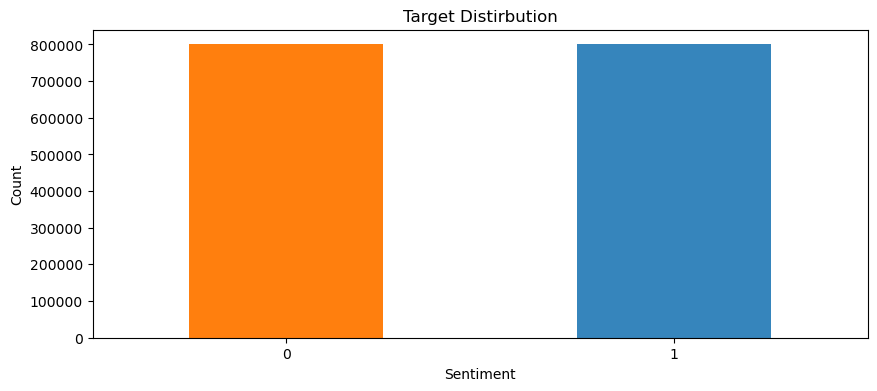

In [114]:
plt.figure(figsize=(10,4))
df_test['Sentiment'].value_counts().plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC'])
plt.title("Target Distirbution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

In [118]:
df_clean.shape

(1589521, 7)

In [120]:
df_clean['Sentiment'].value_counts()

0    795470
1    794051
Name: Sentiment, dtype: int64

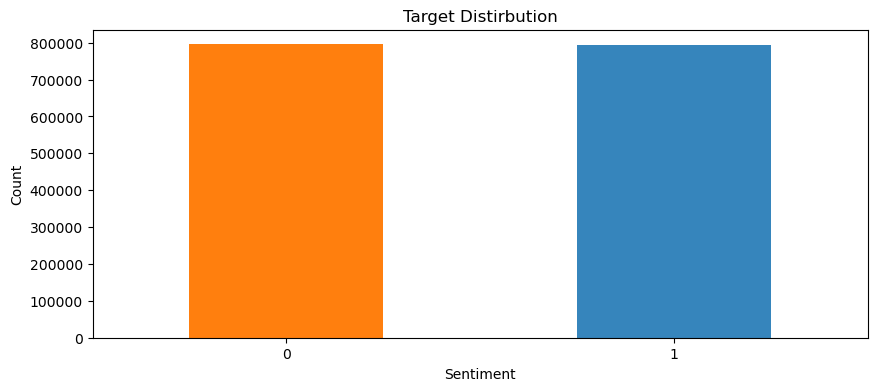

In [121]:
plt.figure(figsize=(10,4))
df_clean['Sentiment'].value_counts().plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC'])
plt.title("Target Distirbution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

In [122]:
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Day'] = df_clean['Date'].dt.day

In [123]:
# added a day of the week column
df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()

In [124]:
df_clean.head()

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,DayOfWeek
0,0,2009-04-06 22:19:45,_TheSpecialOne_,awww thats a bummer you shoulda got david carr of third day to do it d,switchfoot,,;d,4,6,Monday
1,0,2009-04-06 22:19:49,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,,,None,4,6,Monday
2,0,2009-04-06 22:19:53,mattycus,i dived many times for the ball managed to save the rest go out of bounds,kenichan,,None,4,6,Monday
3,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,,,None,4,6,Monday
4,0,2009-04-06 22:19:57,Karoli,no its not behaving at all im mad why am i here because i cant see you all over there,nationwideclass,,None,4,6,Monday


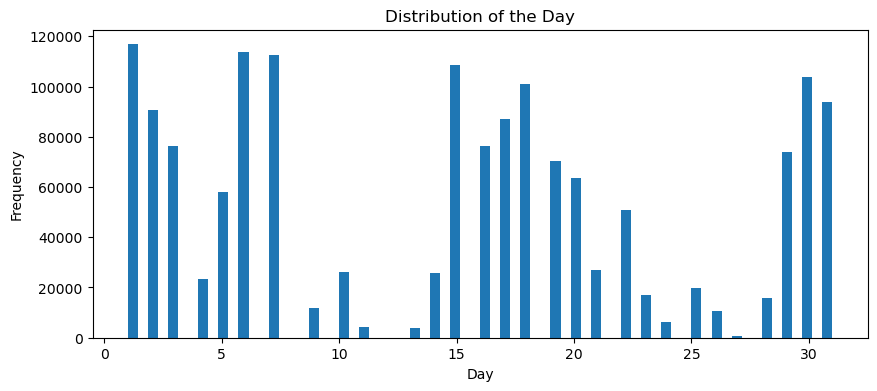

In [125]:
plt.figure(figsize=(10,4))
plt.hist(df_clean['Day'], bins=70) # histogram
plt.title('Distribution of the Day') # title
plt.xlabel('Day') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.show()

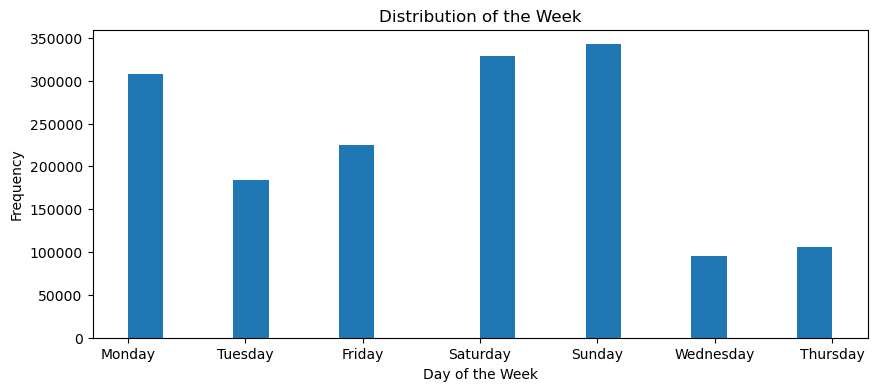

In [126]:
plt.figure(figsize=(10,4))
plt.hist(df_clean['DayOfWeek'], bins=20) # histogram
plt.title('Distribution of the Week') # title
plt.xlabel('Day of the Week') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.show()

In [127]:
df_clean.groupby(['DayOfWeek', 'Sentiment']).size().reset_index(name='Count')

,DayOfWeek,Sentiment,Count
0,Friday,0,114095
1,Friday,1,110581
2,Monday,0,131822
3,Monday,1,175911
4,Saturday,0,157006
5,Saturday,1,172298
6,Sunday,0,144726
7,Sunday,1,197673
8,Thursday,0,79598
9,Thursday,1,25846


<Figure size 3500x600 with 0 Axes>

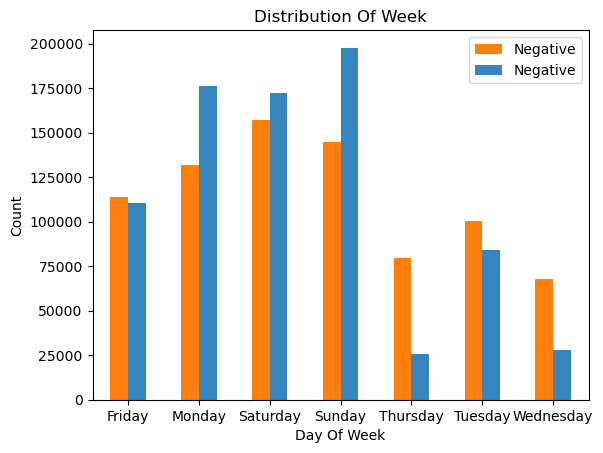

In [129]:
plt.figure(figsize=(35,6)) # setting a figure size 
grouped = df_clean.groupby(['DayOfWeek', 'Sentiment']).size().reset_index(name='Count')
# setting or pivoting Species as index, WNV as a column, and the total count as a value and using barh as a plot
grouped.pivot(index='DayOfWeek', columns='Sentiment', values='Count').plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC']) 
plt.title("Distribution Of Week") # title
plt.xlabel("Day Of Week") # labeling x-axis
plt.ylabel("Count") # labeling y-axis
#updating legend
label_map = {0: 'Negative', 1: 'Positive'}
legend_labels = [label_map[val] for val in df_clean['Sentiment']]
plt.legend(legend_labels)
plt.show()

In [130]:
df_clean['DayOfWeek'].value_counts()

Sunday       342399
Saturday     329304
Monday       307733
Friday       224676
Tuesday      184126
Thursday     105444
Wednesday     95839
Name: DayOfWeek, dtype: int64

In [131]:
df_clean['Date'].dt.month.value_counts()

6    913851
5    575646
4    100024
Name: Date, dtype: int64

### Saving the data

Now that we have spent the time cleaning and working with EDA. We are going to save it to a CSV file and begin to work with Data Wrangling

In [136]:
df_clean.to_csv('cleaned_twitter_data.csv', index=False)

In [137]:
#sanity check
pd.read_csv('cleaned_twitter_data.csv').sample(5)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,DayOfWeek
1425182,1,2009-06-06 18:54:22,hotelqueen,definitely im in canada so i got to play the first beta the tv questions are killing me though,nvobscene,1vs100,None,6,6,Saturday
493312,0,2009-06-15 17:02:48,kristalyn512,im hoping the rain stops before i finish work because i wore sandals today,NaN,NaN,None,6,15,Monday
956441,1,2009-05-17 09:41:28,erinnnraeee,ahhhh i m uppppppppp don t really have a big ass hangover thank god,NaN,NaN,None,5,17,Sunday
811368,1,2009-04-18 08:36:29,rebecajean,you got to see me not epic fail,coryj111,NaN,None,4,18,Saturday
5042,0,2009-04-07 04:39:30,imnickyip,ughhhh i hate you jk,ashfoo,NaN,None,4,7,Tuesday


---

## Conclusion